In [2]:
def show_state(env, step=0, name="", info="", image=None):
    """Fn to visualize the agent playing the game in a notebook
    """
    plt.figure(10)
    plt.clf()
    if image is not None:
        im = image
    else:
        im = env.render(mode="rgb_array")[0]
    plt.imshow(im)
    plt.title("{} | Step: {} {}".format(name, step, info))
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

In [2]:
import torch
from scipy import optimize
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from collections import OrderedDict
import matplotlib.pyplot as plt
from IPython import display
from optimization.Optimizer import PyTorchObjective

from baselines.common.vec_env.subproc_vec_env import SubprocVecEnv
from utils.utils import zelda_spaces

from copy import deepcopy

import time

In [3]:
from es import SimpleGA, OpenES

In [4]:
import gym

import gvgai

from generator.levels.base import Generator

import numpy as np

import ctypes as c

from agent.NNagent import NNagent
from agent.base import Agent

from generator.env_gen_wrapper import GridGame

from scipy.optimize import Bounds

In [5]:
_x = NNagent(GridGame(game='dzelda', 
                      play_length=1000, 
                      path='./levels',
                      lvl_name='4.txt',
                      mechanics=['+', 'g'], # monsters, key, door, wall
                      images=False,
                  ),
            )

In [7]:
print(str(_x.env.generator))

wwwwwwwwwwwww
w...........w
w...........w
w...........w
w.....A.....w
w...........w
w.......+...w
w.g.........w
wwwwwwwwwwwww



In [8]:
from copy import deepcopy

from utils.diff_evo import differential_evolution

import os

import pickle
def save_obj(obj, name):
    with open('./results/'+ name + '.pkl', 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('./results/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [9]:
# generators = [Generator(tile_world=tile(_x.env.generator.locations, *shape),
#                        shape=shape,
#                        path='./levels',
#                        mechanics=['+', 'g'],
#                        generation=0,
#                        locations={}) for _ in range(5)]

In [10]:
# agents = [NNagent(GridGame(game='dzelda', 
#                               play_length=1000, 
#                               path='./levels',
#                               lvl_name='1.txt',
#                               mechanics=['+', 'g'], # monsters, key, door, wall
#                               images=False,
#                           ), 
#                   parent=torch.load("./dzelda_base_agent_150.pt")) 
#           for _ in range(5)]

# for agent, gen in zip(agents, generators):
#     agent.env.generator = gen

In [11]:
# print(str(agents[0].env.generator))

In [12]:

# scores = {}
# answers = {}


# try:

#     for j in range(5): # generations
#         scores[j] = {}
#         answers[j] = {}
#         print('generating')
#         for i, lvl in enumerate(generators):
#             scores[j][i] = {}
#             answers[j][i] = {}
#             m, s = lvl.mutate(1)
#             lvl.locations = m
#             lvl.generation += 1
#             lvl.to_file(i, game='dzelda')
#             print(f'gen: {j}, lvl: {i}, \n{str(lvl)}')

#         print('training')
#         for i, lvl in enumerate(generators):
#             for a, agent in enumerate(agents):
#                 agent.env.generator = lvl

#                 objs = PyTorchObjective(agent)

#                 start = time.time()
#                 ans = differential_evolution(objs.fun, objs.bounds, 
#                                              strategy='rand1bin',
#                                              popsize=49, 
#                                              maxiter=100,
#                                              polish=False, 
#                                              x0=objs.x0)
#                 end = time.time() - start

#                 state_dict = objs.unpack_parameters(ans.x)
#                 objs.f.load_state_dict(state_dict)

#                 torch.save(objs.f, f'./levels/weights/weights_gen{j}_lvl{i}_agent{a}.pt')

#                 # answers[generation][lvl][agentId]
#                 answers[j][i][a] = {'ans':ans, 'agent':deepcopy(objs.f)}

#         print('evaluating')
#         # evaluate each agent on each env from this 'generation'
#         for a, agent in enumerate(agents):
#             # evaluate each agent with the generated levels this generation
#             for i, lvl in enumerate(generators):
#                 agent.env.generator = lvl
#                 agent.nn = answers[j][i][a]['agent']
#                 scores[j][i][a] = agent.fitness()

#         save_obj(scores[j], f'gen{j}_scores')
#         save_obj(answers[j], f'gen{j}_results')
        
# except Exception as e:
#     print(e)

In [13]:
z = PyTorchObjective(_x)

In [14]:
import devo
import devo.jDE
import devo.CoDE

In [15]:
# num_gen = num_fn / popsize

In [30]:
start = time.time()
# Try increasing the popsize argument by a lot. 
result_02 = devo.jDE.run(
                            100000,
                            z.popsize,
                            0.5,
                            0.1,
                            z.fun_c,
                            z.x0.shape[0],
                            -5.0,
                            5.0,
                            z.create_population().ctypes.data_as(c.POINTER(c.c_double)),
                            z.init_fitnesses.ctypes.data_as(c.POINTER(c.c_double)),
                            z.results_callback
                            )

end = time.time() - start

In [41]:
end // 3600

25.0

In [31]:
z.best_score

-2.0

In [32]:
z.best_individual

array([ 1.19041644,  2.29482241, -1.16805108, ..., -1.78108086,
       -2.46648155,  2.56524846])

In [42]:
env2 = GridGame(game='dzelda', 
                      play_length=1000, 
                      path='./levels',
                      lvl_name='4.txt',
                      mechanics=['+', 'g'], # monsters, key, door, wall
                      images=True,
                  )

nn2 = NNagent(env2)

_x2 = PyTorchObjective(nn2)

In [43]:
_x2.update_nn(z.best_individual)

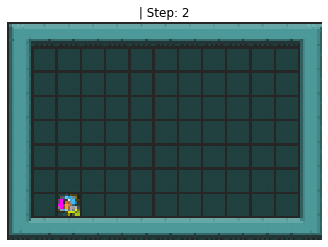

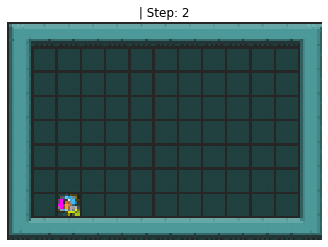

In [44]:
_x2.agent.fitness(fn=show_state)
_x2.agent.fn = None

In [39]:
np.save(f'./results/EC/jDE_{10000}gen_lvl4_best_weights.npy', z.best_individual)

In [40]:
torch.save(_x2.agent.nn, f'./results/EC/jDE_{10000}gen_lvl4_best_weights.pt')

In [45]:
env2.close()

Expecting ACT_STATE from GVGAI, but received GamePhase.END_STATE


```
DE.run(
    max_function_evaluations,
    population_size,
    scaling_factor,
    crossover_rate,
    objective_function,
    problem_size,
    lower_bound,
    upper_bound,
    init_population,
    init_fitnesses,
    result_callback,
)
```

In [ ]:
NPARAMS = z.x0.shape[0]            # make this a 100-dimensinal problem.
NPOPULATION = 32                   # use population size of 101.
MAX_ITERATION = 10000              # run each solver for 5000 generations.

In [ ]:
!free -g

In [ ]:
import time
import pandas as pd
import cma

In [ ]:
def evaluate(envs, objs, population_weights):
    # nnstart = time.time()
    for i, obj in enumerate(objs):
        obj.update_nn(population_weights[i])
    # nnend = time.time() - nnstart
    total_rewards = np.zeros(NPOPULATION)
    obs = envs.reset()
    
    # openAI vec-envs will automatically restart an env
    # if env_a has finished but env_b has not.
    # This is good behavior for RL, but BAD behavior for EC. 
    # So, we'll mask out envs-that-have-finished of the total_reward computation.
    mask  = np.zeros(len(objs), dtype=bool)
    while not np.all(mask):
        actions = [obj.agent.get_action(obs[i]) for i, obj in enumerate(objs)]
        envs.step_async(actions)
        obs, rewards, dones, infos = envs.step_wait()
        
        # if the env has not finished, add its reward information
        # to the to the total_reward/fitness vector.
        #  If the env has finished once, update the mask
        #  and then use that mask to zero-out further rewards. 
        total_rewards += ~mask * rewards
        
        # update mask at index where an env has finished once.
        for i, d in enumerate(dones):
            if d and mask[i] == False:
                mask[i] = d

    # end = time.time() - nnstart + nnend
    return total_rewards#, end, nnend

In [ ]:
from datetime import datetime
import gc

In [ ]:
def test_solver(solver, seed):
    date = datetime.today().strftime('%Y_%m_%d')
    sol_name = str(solver).split(' ')[0][1:]
    tempdir = f'./results/EC/{sol_name}_{MAX_ITERATION}gens_{date}'
    tmp = os.path.join(tempdir, 'tmp')
    if not os.path.exists(tempdir):
        os.mkdir(tempdir)
        os.mkdir(tmp)
    
    # for vectorized version, use this.
    gyms  = [seed.env.make() for _ in tqdm(range(solver.popsize))]    #GridGame envs
    objs  = [PyTorchObjective(NNagent(GG=None, parent=seed.nn)) 
             for _ in tqdm(range(solver.popsize))]                    #Objective(NNagents)

    envs = SubprocVecEnv(gyms, 
                         spaces=zelda_spaces, 
                         context='fork')
    
    print("make vec envs")
    s = solver.ask()
    print("asked solver")
    s[0] = objs[0].x0
    solver.solutions[0] = s[0]
    init_fit = evaluate(envs, objs, s)
    print('evaluated solver')
    solver.tell(init_fit)
    print('told solver')
    scores = {}
    scores[-1] = init_fit
    
    history = []
    print('starting looping')
    for j in tqdm(range(MAX_ITERATION)):
        scores[j] = {}
        solutions = solver.ask()
        
        fitness_list = evaluate(envs, objs, solutions)

        solver.tell(fitness_list)
        result = solver.result() # first element is the best solution, second element is the best fitness
        history.append(result[1])
        
        scores[j] = fitness_list
        
        if (j+1) % 500 == 0:
            print("fitness at iteration", (j+1), result[1])
            tmp_scores = pd.DataFrame.from_dict(scores)
            tmp_scores.to_csv(os.path.join(tmp, 
                                           f'{sol_name}_fitness_scores_{j+1}_of_{MAX_ITERATION}_{date}.csv'))
            np.save(os.path.join(tmp, 
                                 f'{sol_name}_best_weights_gen_{j+1}_{date}.npy'), result[0])
            del tmp_scores
            gc.collect()
            
            
    df = pd.DataFrame.from_dict(scores)
    df.to_csv(os.path.join(tempdir, 
                           f'{sol_name}_{date}_fitness_scores_{MAX_ITERATION}gens.csv'))
    np.save(os.path.join(tempdir, 
                         f'{sol_name}_{date}_best_weights_{MAX_ITERATION}gens.npy'), result[0])
    np.save(os.path.join(tempdir, 
                         f'{sol_name}_{date}_{MAX_ITERATION}history.npy'), history)

    envs.close()
    
    return history, result

In [ ]:
from es import CMAES

In [ ]:
from es import PEPG

In [ ]:
pepg = PEPG(NPARAMS,             # number of model parameters
               sigma_init=0.10,              # initial standard deviation
               sigma_alpha=0.20,             # learning rate for standard deviation
               sigma_decay=0.999,            # anneal standard deviation
               sigma_limit=0.01,             # stop annealing if less than this
               sigma_max_change=0.2,         # clips adaptive sigma to 20%
               learning_rate=0.01,           # learning rate for standard deviation
               learning_rate_decay = 0.9999, # annealing the learning rate
               learning_rate_limit = 0.01,   # stop annealing learning rate
               elite_ratio = 0,              # if > 0, then ignore learning_rate
               popsize=NPOPULATION,          # population size
               average_baseline=True,        # set baseline to average of batch
               weight_decay=0.01,            # weight decay coefficient
               rank_fitness=False,           # use rank rather than fitness numbers
               forget_best=False)

In [ ]:
pepg_history, pepg_result = test_solver(pepg, _x)

In [ ]:
plt.plot(pepg_history)
plt.savefig('./results/es.PEPG_10000gens_2020_01_05/history.png')

In [ ]:
pepg_res = pepg_result[0]
z.update_nn(pepg_res)
z.eval_fn()

In [ ]:
# Shrink network?
# neat

cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.05, #shrink this.
              diag=True
          )

In [ ]:
cma_history, cma_result = test_solver(cmaes, _x)

In [ ]:
plt.plot(cma_history)

In [ ]:
cma_res = cma_result[0]

In [ ]:
z.update_nn(cma_res)
z.eval_fn()

----  

In [ ]:
# # defines genetic algorithm solver
# ga = SimpleGA(NPARAMS,                # number of model parameters
#                sigma_init=0.5,        # initial standard deviation
#                popsize=NPOPULATION,   # population size
#                elite_ratio=0.1,       # percentage of the elites
#                forget_best=False,     # forget the historical best elites
#                weight_decay=0.00,     # weight decay coefficient
#               )

# # STILL RUNNING, BUT IS NOT UPDATING THE GUI. 
# ## Please don't touch.

# ga_history, result = test_solver(ga, _x)

# plt.plot(ga_history)

# result[0]

# z.update_nn(result[0])

# z.eval_fn()

# oes = OpenES(NPARAMS,                  # number of model parameters
#             sigma_init=0.5,            # initial standard deviation
#             sigma_decay=0.999,         # don't anneal standard deviation
#             learning_rate=0.1,         # learning rate for standard deviation
#             learning_rate_decay = 1.0, # annealing the learning rate
#             popsize=NPOPULATION,       # population size
#             antithetic=False,          # whether to use antithetic sampling
#             weight_decay=0.00,         # weight decay coefficient
#             rank_fitness=False,        # use rank rather than fitness numbers
#             forget_best=False)

# oes_history, result = test_solver(oes, _x)

# plt.plot(oes_history)

# oes_res = result[0]

In [ ]:
s = _x.fitness(fn=show_state) if _x.env.pics else _x.fitness()
_x.vis=None
print(s)

In [ ]:
np.save('winning_with_monster.npy', _x.images)

In [ ]:
# 1600 * 1000 * 100 # frames seen

In [ ]:
torch.save(_x.nn, "./dzelda_base_agent_150.pt")

In [ ]:
_x.env.env.close()

```

First: Train an agent on an extremely simple level to give the agent a behavior starting point. 
    - In POET that was a flat terrain. In my case, it's a level that looks like this: 
    -   wwwwwwwwwwwww    
        w...........w    A --> agent
        w...........w    + --> key
        w.+....A....w    g --> goal
        w...........w
        w...........w    Task: Take the key to the goal
        w...........w
        w.g.........w
        wwwwwwwwwwwww
        
Second: Initialize agent-environment population with the first learned behavior
    
While True:
    
    Evaluate each agent in it's paired environment
    
    Mutate environments (every m loops). 
    
        Mutation of an environment causes the agent neural network to be copied into the new environment
        This increases the population.
        
        - An example mutation could be
            - adding/removing in an enemy (three types)
            - adding/moving a goal
            - adding/removing a key
            - moving an agent
            - An example new level could look like this: 
                - wwwwwwwwwwwww    
                  w....+..1...w    A --> agent
                  w...g.......w    + --> key
                  w...........w    g --> goal
                  w...........w
                  w...w.......w    Task: Take the key to the goal
                  w.......A...w
                  w.g.........w
                  wwwwwwwwwwwww

    (slowly) Run one step of optimization for each agent within it's paired environment.
    
    Transfer agents between environments (every k loops)
        Intuition: Agent alpha might have learned behavior in it's paired environment that is actually behavior that is very good in environment beta. 
        
        - test every agent in every environment. 
        - transfer into environment i, the agent j, who performed the best.
    
    Return to top of the loop.
    
```

# Note. 

Moving the key from top right corner to mid left created a slightly simpler env.

----  

we were not able to learn the good policy if we kept the wieght range as [-2, 2]. 

Next I am retrying the same starting point but with range [-5, 5]. --> solved extremely simple env with this range and simpler env. 



----  
Then moving the key up one spot meant that the agent needs more training. So far it has failed to take the key and get to the goal after an additional 20 generations of training (but does get the key). I am giving it another 20 generations. 

After the agent learns the new environment (key moved up one spot), I am going to take those weights and put them back into the first env (key moved back down one spot).

----  
Note: There are times that the optimization straight up fails after only a generation or two. I think this is coming from the fact that the problem is very sparely rewarded.   

----

Edited dzelda.txt: 
    - picking up key +1
    - killing monster +1
    - taking key to door +2


1)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+....A....w
w...........w
w...........w
w...........w
w.g.........w
wwwwwwwwwwwww
```
2)   
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.........w
w......A....w
w...........w
w...........w
w.g.........w
wwwwwwwwwwwww
```

3)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.........w
w......A....w
w...........w
w..1........w
w.g.........w
wwwwwwwwwwwww
```

4)  
```
wwwwwwwwwwwww
w...........w
w...........w
w.+.w.......w
w...w..A....w
w...........w
w..1........w
w.g.........w
wwwwwwwwwwwww
```

Model:
```  
   Net(
      (conv1): Conv2d(13, 8, kernel_size=(3, 3), stride=(1, 1))
      (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
      (fc1): Linear(in_features=96, out_features=48, bias=True)
      (fc2): Linear(in_features=48, out_features=24, bias=True)
      (fc3): Linear(in_features=24, out_features=6, bias=True)
   )

```

# Differetial Evolution:

## $\theta :=$ model_weights  
## Pick $\theta_a, \theta_b, \theta_c$   
## $Proposal_\theta = \theta_a + \alpha * (\theta_b - \theta_c))$

## Pros:
Computationally efficient  
Self-adaptation and crossover due to $\theta_b - \theta_c$

## Problems:  

$\theta$ is a ~10000 dimensional vector. 

Curse of Dimensionality!   
    - As the dimension go up, vectors become equidistant  

Good weight configurations are sparse.

Rewards are sparse.
    
    

Interesting observation. Whenever the agent completes the goal, it seems to do so with the minimal path. That's suprising to me because we're giving the agent 1000 time-steps and the fitness function is not taking account (yet) of the number of steps that the agent has used as a weighting on the score it achieves. 